## tensorflow を使った回帰分析

## パッケージのインポート

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## tensorflow を使った変数の定義

In [12]:
x = tf.placeholder(tf.float32, [None, 5])
a = tf.Variable(tf.zeros([5,1]))

y = tf.matmul(x, a)

t = tf.placeholder(tf.float32, [None,1])

loss = tf.reduce_sum(tf.square(y-t))

## 最適化関数の選択

In [13]:
train_step = tf.train.AdamOptimizer().minimize(loss)

## 学習データの作成

In [25]:
train_t = np.array([3.1, -0.8, 4.2, 9.9, 17.3, 24.2,
                    29.0, 35.2, 32.0, 18.6, 9.1, 4.6])
train_t = train_t.reshape([12,1])

train_x = np.zeros([12,5])

for row, month in enumerate(range(1, 13)):
    for col, n in enumerate(range(0,5)):
        train_x[row][col] = month**n

## セッションの呼び出しと変数の初期化

In [26]:
sess = tf.Session()
#sess.run(tf.initialize_all_variables()) ⇒ 2017年からtf.global_variables_initializer()に変更
sess.run(tf.global_variables_initializer())

## 学習の開始

In [31]:
i = 0
for _ in range(100000):
    i += 1
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    if i %  10000 == 0:
        loss_val = sess.run(loss, feed_dict={x:train_x, t:train_t})
        print('Step: %d, Loss: %f' % (i, loss_val))
        
        a_val = sess.run(a)
        print(a_val) 
        
        #fig = plt.figure()
        #subplot = fig.add_subplot(1,1,1)
        #subplot.set_xlim(1,12)
        #subplot.scatter(range(1,13), train_t)
        #linex = np.linspace(1,12,100)
        #liney = predict(linex)
        #subplot.plot(linex, liney)

Step: 10000, Loss: 111.581924
[[ 4.635398  ]
 [-8.2198    ]
 [ 3.8598795 ]
 [-0.37870258]
 [ 0.00932034]]
Step: 20000, Loss: 107.656036
[[ 5.2769914 ]
 [-8.891684  ]
 [ 4.0586324 ]
 [-0.40073276]
 [ 0.01015459]]
Step: 30000, Loss: 104.252502
[[ 5.8945    ]
 [-9.538377  ]
 [ 4.249909  ]
 [-0.42195454]
 [ 0.01093911]]
Step: 40000, Loss: 101.091019
[[  6.488782  ]
 [-10.160774  ]
 [  4.4340153 ]
 [ -0.4423773 ]
 [  0.01169842]]
Step: 50000, Loss: 98.165520
[[  7.0606995 ]
 [-10.759696  ]
 [  4.6111593 ]
 [ -0.46202585]
 [  0.01242923]]
Step: 60000, Loss: 95.457245
[[  7.610999 ]
 [-11.336068 ]
 [  4.781653 ]
 [ -0.4809407]
 [  0.0131305]]
Step: 70000, Loss: 92.951523
[[  8.140413  ]
 [-11.89049   ]
 [  4.945641  ]
 [ -0.4991323 ]
 [  0.01380555]]
Step: 80000, Loss: 90.628006
[[  8.65031   ]
 [-12.424597  ]
 [  5.1036425 ]
 [ -0.5166622 ]
 [  0.01445576]]
Step: 90000, Loss: 88.477402
[[  9.141326  ]
 [-12.938792  ]
 [  5.2557244 ]
 [ -0.5335344 ]
 [  0.01508005]]
Step: 100000, Loss: 86.483

## 学習結果のプロット

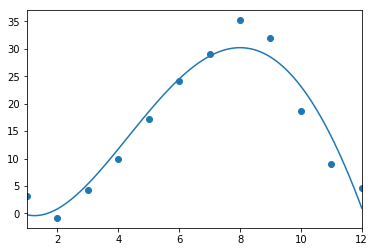

In [30]:
def predict(x):
    result = 0.0
    for n in range(0,5):
        result += a_val[n][0] * x**n
    return result

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xlim(1,12)
subplot.scatter(range(1,13), train_t)
linex = np.linspace(1,12,100)
liney = predict(linex)
subplot.plot(linex, liney)